## Data Loading and Initial Exploration

Begin by importing necessary libraries and loading the dataset. The first few rows of the data are displayed to understand the structure. Also check for missing values and basic statistics to get an overview of the dataset.


In [4]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(df.info())
print(df.isnull().sum())
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory Data Analysis (EDA)

This section includes univariate and bivariate analysis to identify trends, patterns, and relationships in the dataset. Visualizations like histograms, boxplots, and bar charts help in understanding the distribution and behavior of key features.


C:\Users\User\AppData\Local\Temp\ipykernel_11820\760643660.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


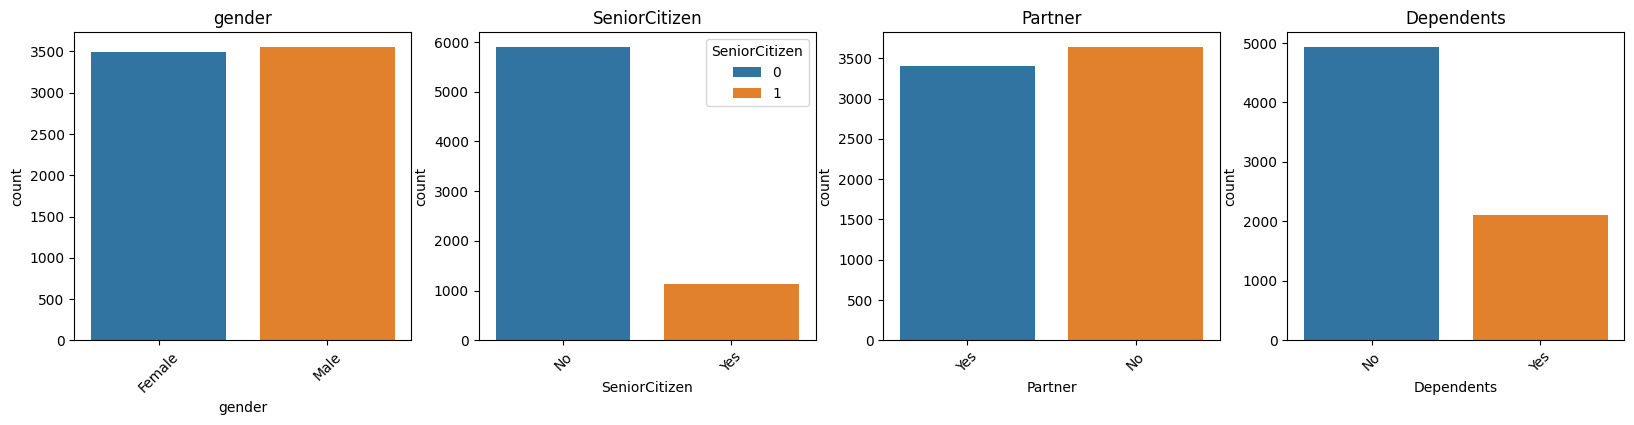

In [15]:
# Performing Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

exploratory_columns = ['gender','SeniorCitizen',"Partner","Dependents"]

plt.figure(figsize=(20,4))

for i, col in enumerate(exploratory_columns):
    ax = plt.subplot(1, len(exploratory_columns), i+1)
    sns.countplot(x=str(col), hue = str(col), data=df)
    ax.set_title(f"{col}")
    ax.tick_params(axis='x', rotation=45)
    x_values = sorted(df[col].unique())
    if(len(x_values) == 2 and x_values == [0, 1]):
      ax.set_xticklabels(['No', 'Yes'])

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11820\625760115.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=["Green", "Orange"])


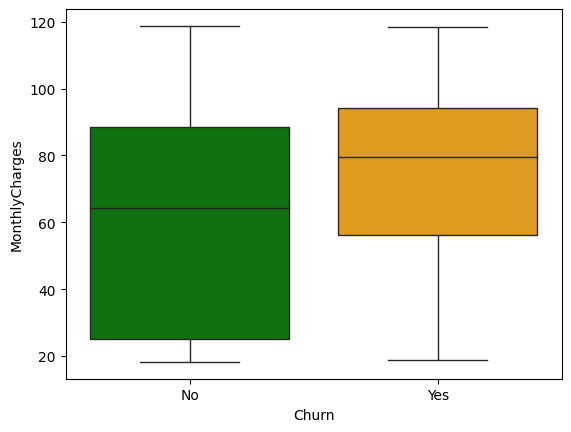

In [17]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=["Green", "Orange"])
plt.show()

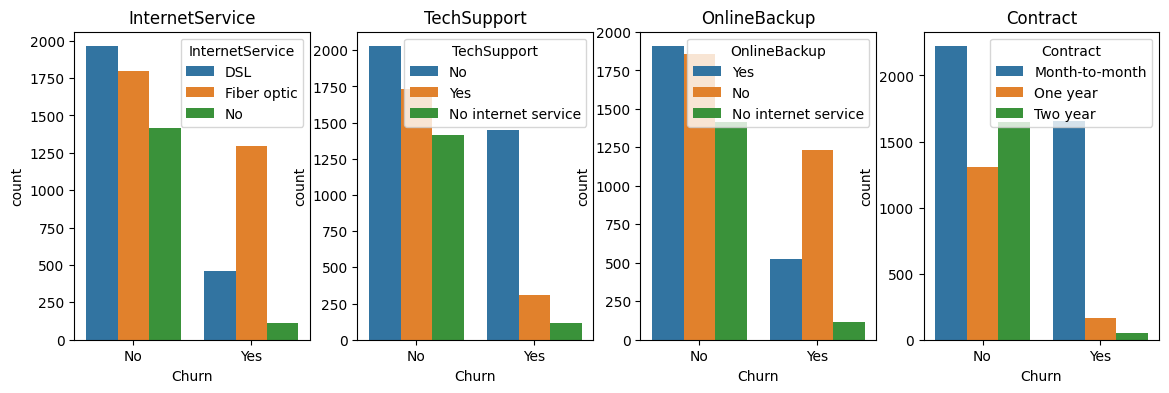

In [19]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

## Data Preprocessing

Before training a model, it is necessary to preprocess the data by:
- Handling missing values (if any)
- Converting categorical variables into numerical ones using encoding
- Scaling features where necessary
- Splitting the data into training and test sets


In [20]:
# Cleaning data
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [21]:
# Encoding categorical features by converting them
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

In [22]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [23]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
cleaned_df = pd.merge(num_features, df_cat, left_index=True, right_index=True)

Removing oversampling

In [24]:
from sklearn.model_selection import train_test_split

cleaned_df = cleaned_df.dropna().drop(['customerID'],axis=1)
X = cleaned_df.drop(['Churn'],axis=1)
y = cleaned_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)


## Model Training and Evaluation

Train multiple machine learning models to predict customer churn. The models are evaluated based on accuracy, precision, recall, and F1-score. Cross-validation may also be used to ensure stability of the model performance.

Models used in this section may include:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- XGBoost


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [27]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.771563981042654


In [52]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import pickle

In [53]:
list_of_models = {
    'logistic_regression' : LogisticRegression(random_state = 42, max_iter = 1000),
    'decision_tree' : DecisionTreeClassifier(max_depth = 5, random_state = 42),
    'Random_forest' : RandomForestClassifier(n_estimators = 150, max_depth = 5, random_state = 42),
    'GBDT' : GradientBoostingClassifier(n_estimators = 150, max_depth = 5, random_state = 42),
    "XGBoost" : xgb.XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42)
}
model_titles = ["LogisticRegression:",
                "DecisionTreeClassifier:",
                "RandomForestClassifier:",
                "GradientBoostingClassifier:",
                "XGBClassifier:"]


For Model: logistic_regression


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For Training Set:

Macro F1 Score: 0.8068448901800191

Confusion Matrix:


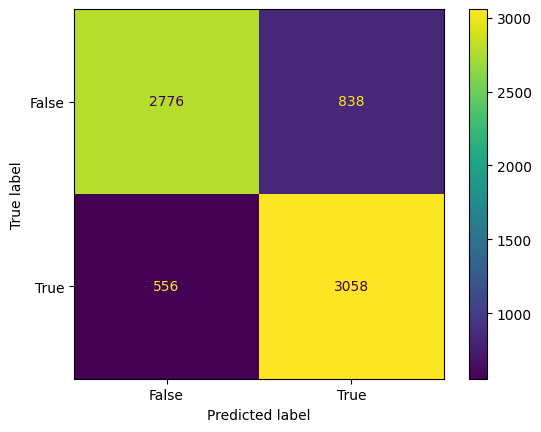

For Test Set:

Macro F1 Score: 0.7155023846325517

Confusion Matrix:


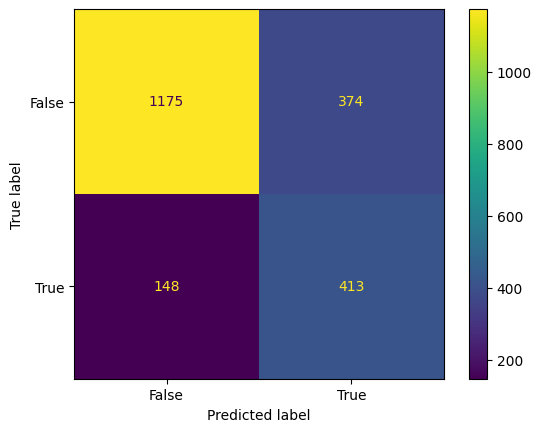


For Model: decision_tree

For Training Set:

Macro F1 Score: 0.8129391994819095

Confusion Matrix:


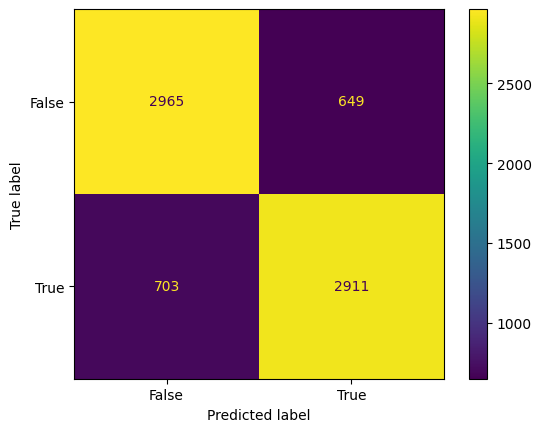

For Test Set:

Macro F1 Score: 0.7056490081776511

Confusion Matrix:


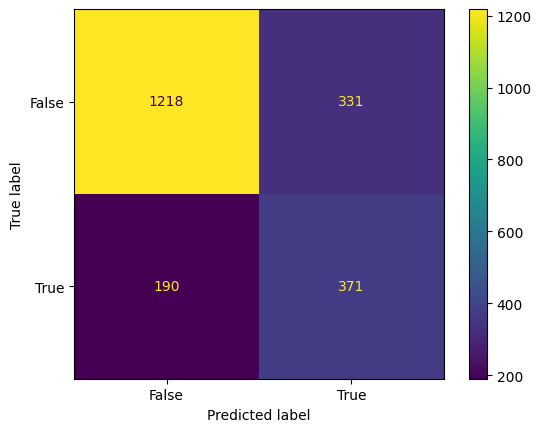


For Model: Random_forest

For Training Set:

Macro F1 Score: 0.8262632362734714

Confusion Matrix:


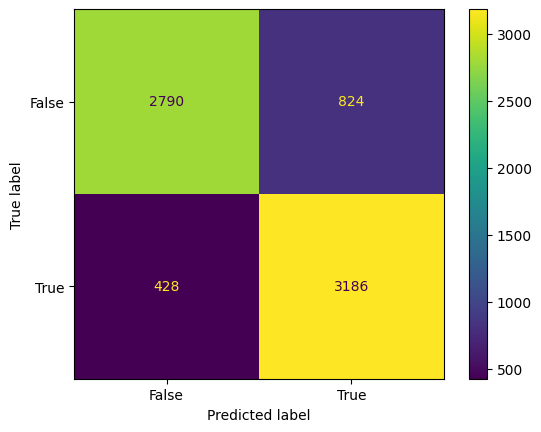

For Test Set:

Macro F1 Score: 0.7107751717324461

Confusion Matrix:


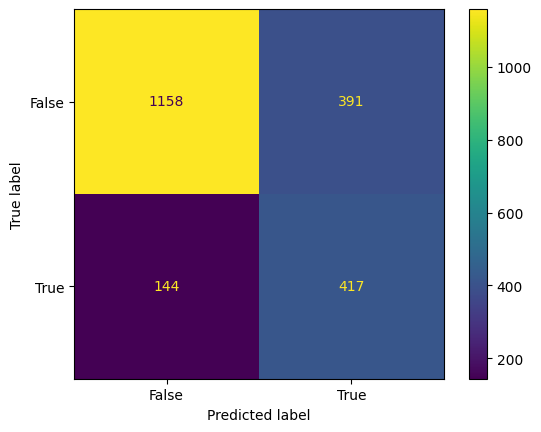


For Model: GBDT

For Training Set:

Macro F1 Score: 0.9179491070919743

Confusion Matrix:


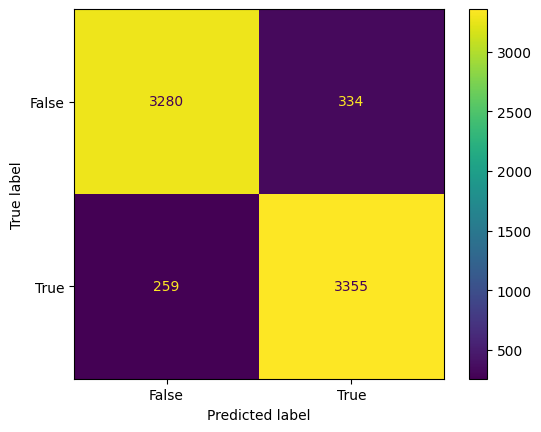

For Test Set:

Macro F1 Score: 0.716770668663505

Confusion Matrix:


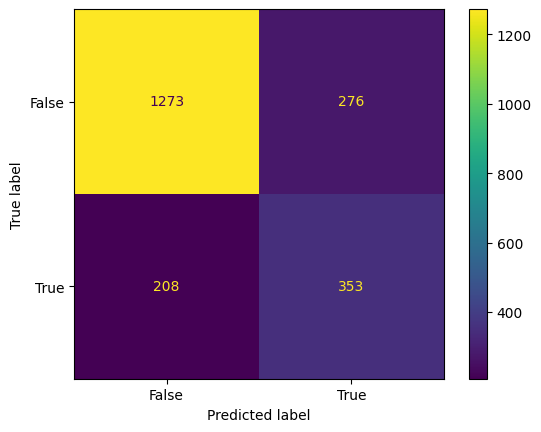


For Model: XGBoost

For Training Set:

Macro F1 Score: 0.9727426767033898

Confusion Matrix:


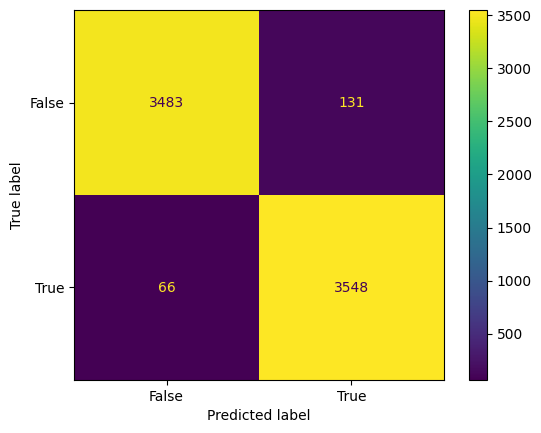

For Test Set:

Macro F1 Score: 0.6948197494644647

Confusion Matrix:


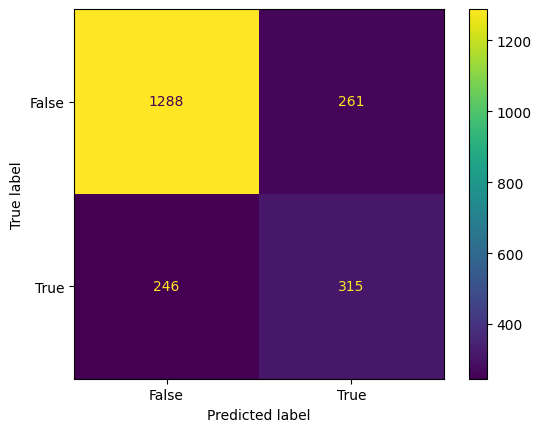

In [54]:
f1_train_scores = []
f1_test_scores = []
recall_test_scores = []
accuracy_train_scores = []
accuracy_test_scores = []

model_names = list_of_models.keys()

for model in model_names:
    print("\nFor Model:", model)

    list_of_models[model].fit(X_train, y_train)

    print("\nFor Training Set:")

    y_train_pred = list_of_models[model].predict(X_train)

    f1_train = f1_score(y_train, y_train_pred, average='macro')
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("\nMacro F1 Score:", f1_train)

    print("\nConfusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

    print("For Test Set:")

    y_test_pred = list_of_models[model].predict(X_test)

    f1_test = f1_score(y_test, y_test_pred, average='macro')
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("\nMacro F1 Score:", f1_test)

    recall_test_score = recall_score(y_test, y_test_pred, average='macro')

    print("\nConfusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)
    recall_test_scores.append(recall_test_score)
    accuracy_train_scores.append(accuracy_train)
    accuracy_test_scores.append(accuracy_test)

## Selecting Best Performing Models

Compare the results to select the best performing model.

Based on evaluation metrics such as accuracy, precision, recall, and F1-score, we shortlist the top-performing models. These models showed consistent performance and are suitable candidates for deployment.


In [56]:
print(f"{' '*28}f1_train_scores  | f1_test_scores   | recall_test_scores  | accuracy train    | accuracy test")
for i, n in enumerate(model_titles):
  spaces = (27 - len(n))*' '
  print(f"{n}{spaces} {f1_train_scores[i]} {f1_test_scores[i]} {recall_test_scores[i]} {accuracy_train_scores[i]} {accuracy_test_scores[i]}")

                            f1_train_scores  | f1_test_scores   | recall_test_scores  | accuracy train    | accuracy test
LogisticRegression:         0.8068448901800191 0.7155023846325517 0.7473696444949245 0.8071389042612064 0.75260663507109
DecisionTreeClassifier:     0.8129391994819095 0.7056490081776511 0.7238164119453756 0.8129496402877698 0.7530805687203791
RandomForestClassifier:     0.8262632362734714 0.7107751717324461 0.7454472956504627 0.8267847260653016 0.7464454976303317
GradientBoostingClassifier: 0.9179491070919743 0.716770668663505 0.7255270204801212 0.9179579413392362 0.7706161137440758
XGBClassifier:              0.9727426767033898 0.6948197494644647 0.6965007612294287 0.9727448810182623 0.7597156398104266


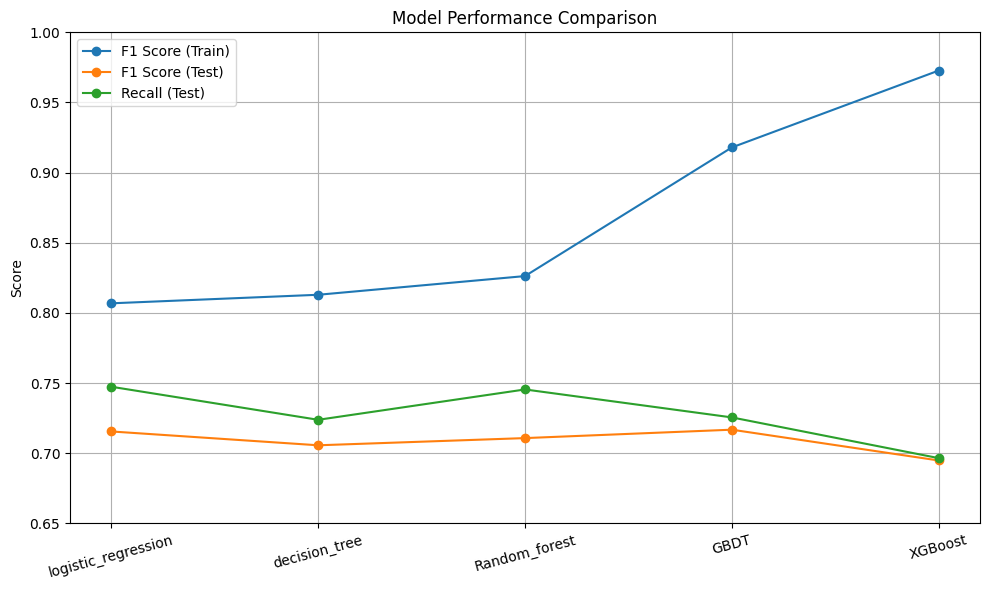

In [34]:
models = list(list_of_models.keys())
x = range(len(models))

plt.figure(figsize=(10,6))
plt.plot(x, f1_train_scores, label='F1 Score (Train)', marker='o')
plt.plot(x, f1_test_scores, label='F1 Score (Test)', marker='o')
plt.plot(x, recall_test_scores, label='Recall (Test)', marker='o')
plt.xticks(x, models, rotation=15)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.65, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
performance_df = pd.DataFrame({
    'Model': model_titles,
    'F1 Score (Train)': f1_train_scores,
    'F1 Score (Test)': f1_test_scores,
    'Recall (Test)': recall_test_scores,
    'Accuracy (Train)': accuracy_train_scores,
    'Accuracy (Test)': accuracy_test_scores
})
performance_df
# Save to CSV
performance_df.to_csv('data/model_performance.csv', index=False)

### Selected Models
Based on earlier evaluation results, we select the best-performing models—Logistic Regression and Random Forest—for final deployment. These models are retrained using optimized hyperparameters to ensure stability and reproducibility. This step prepares the models for production or further analysis.

## Saving Models using Pickle

To reuse the trained models without retraining, we serialize them using Python's `pickle` module. This allows us to load the models later for predictions or integration into a production system.


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Macro F1 Score: 0.7082956714755113
Macro Recall Score: 0.7658549582176426

Confusion Matrix:


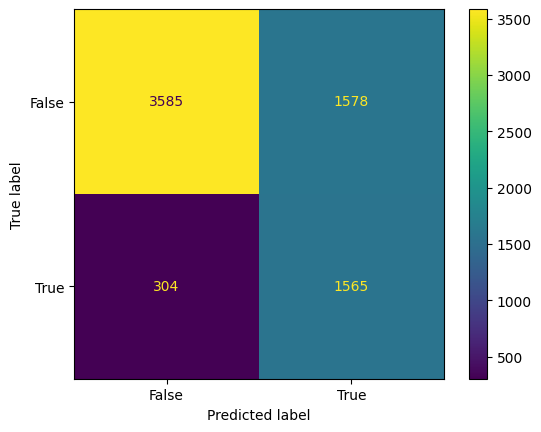

In [47]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Final Model Selection
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
rand_forest_model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)

# Fit models
log_reg_model.fit(X_train, y_train)
rand_forest_model.fit(X_train, y_train)

# Save models using pickle
with open("models/logistic_model.pkl", "wb") as f:
    pickle.dump(log_reg_model, f)

with open("models/random_forest_model.pkl", "wb") as f:
    pickle.dump(rand_forest_model, f)

# Predict probabilities using both models
y_pred_proba_log = log_reg_model.predict_proba(X)[:, 1]
y_pred_proba_rand = rand_forest_model.predict_proba(X)[:, 1]

# Combine predictions (simple averaging)
y_pred_proba = (y_pred_proba_log + y_pred_proba_rand) / 2.0

# Final binary predictions using threshold 0.4
y_pred = np.where(y_pred_proba > 0.4, 1, 0)

# Evaluation
f1 = f1_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')

print("\nMacro F1 Score:", f1)
print("Macro Recall Score:", recall)

# Confusion Matrix
print("\nConfusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()


## Future Improvements

This notebook successfully demonstrates a workflow for customer churn prediction using machine learning. We covered EDA, model training, evaluation, saving models, and interpreting results.

**Next Steps:**
- Implement hyperparameter tuning for further improvements
- Deploy selected models into a production environment
- Create a monitoring pipeline to track model performance over time
